<a href="https://colab.research.google.com/github/gchaewon/Euron5th_BusTayo/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 버스 승하차 데이터 EDA

서울시 버스 승하차 예측에 앞서 데이터 EDA 진행

서울시 버스 승하차 23년 12월 데이터를 사용함

In [174]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

# 지도 관련 시각화
import folium
from folium.plugins import MarkerCluster
import geopy.distance

## 0. 데이터 로딩

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
path = '/content/drive/MyDrive/Euron/프로젝트/'

data = pd.read_csv(path+'bus.csv',encoding='cp949')
print(data.shape)
data.head(3)

(41674, 57)


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,교통수단타입코드,교통수단타입명,등록일자
0,202312,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리(00075),132,160,114,120,...,219,267,179,234,240,265,159,10,서울간선버스,20240103
1,202312,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리(00032),10,10,199,191,...,0,0,0,0,0,0,0,51,서울심야버스,20240103
2,202312,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리(00066),127,133,13,7,...,306,350,272,340,315,251,228,10,서울간선버스,20240103


### 칼럼명 확인

In [177]:
data.columns

Index(['사용년월', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '00시승차총승객수',
       '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '교통수단타입코드',
       '교통수단타입명', '등록일자'],
      dtype='object')

### 불필요한 칼럼 삭제

1) 노선명, 등록일자, 교통수단타입코드 삭제

In [178]:
data = data.drop(['노선명', '등록일자', '교통수단타입코드'], axis =1)
data.columns

Index(['사용년월', '노선번호', '표준버스정류장ID', '버스정류장ARS번호', '역명', '00시승차총승객수',
       '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '교통수단타입명'],
      dtype='object')

2) 심야 시간 10시 ~ 5시 데이터 삭제

In [179]:
hours_to_drop = ['22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수',
                 '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수',
                 '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수',
                 '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수']

data = data.drop(columns=hours_to_drop, axis=1)

In [180]:
data.head(1)

,사용년월,노선번호,표준버스정류장ID,버스정류장ARS번호,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,202312,741,100000001,1001,종로2가사거리(00075),143,94,453,308,382,...,621,407,726,391,489,314,219,267,179,서울간선버스


### id 피처 추가 및 피처명 변경

- id (데이터 고유값)
- month(월 단위)
- bus_route_id(표준 버스 정류장 ID)
- bus_id(노선 번호)
- station_code(버스 정류장 ARS 번호)
- station_name(역명)
- X~Y ride(1시간 단위 승차 총 승객 수)
- X~Y takeoff(1시간 단위 하차 총 승객 수)
- type(교통 수단 타입명)

In [181]:
data.insert(0, 'id', range(0, len(data)))
data.head(1)

,id,사용년월,노선번호,표준버스정류장ID,버스정류장ARS번호,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,0,202312,741,100000001,1001,종로2가사거리(00075),143,94,453,308,...,621,407,726,391,489,314,219,267,179,서울간선버스


In [182]:
data.columns

Index(['id', '사용년월', '노선번호', '표준버스정류장ID', '버스정류장ARS번호', '역명', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '교통수단타입명'],
      dtype='object')

In [183]:
columns={'사용년월':'month', '노선번호': 'bus_id', '교통수단타입명': 'type',
         '버스정류장ARS번호': 'station_code', '표준버스정류장ID': 'bus_route_id', '역명':'station_name'}

data.rename(columns=columns, inplace=True)

In [184]:
# 승하차 칼럼명 변경
for hour in range(6, 22):
    ride_column = f'{hour}시승차총승객수'
    new_ride_column = f'{hour}~{hour+1}_ride'
    data.rename(columns={ride_column: new_ride_column}, inplace=True)

    takeoff_column = f'{hour}시하차총승객수'
    new_takeoff_column = f'{hour}~{hour+1}_takeoff'
    data.rename(columns={takeoff_column: new_takeoff_column}, inplace=True)


In [185]:
data.head(1)

,id,month,bus_id,bus_route_id,station_code,station_name,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,type
0,0,202312,741,100000001,1001,종로2가사거리(00075),143,94,453,308,...,621,407,726,391,489,314,219,267,179,서울간선버스


### 심야버스 필터링

In [186]:
data = data[data['type'] != '서울심야버스']
count = data[data['type'] == '서울심야버스'].shape[0]
print(f'서울심야버스인 행의 개수: {count}')

서울심야버스인 행의 개수: 0


## 1. EDA

In [187]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

구조 확인

In [188]:
data.head()

,id,month,bus_id,bus_route_id,station_code,station_name,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,type
0,0,202312,741,100000001,1001,종로2가사거리(00075),143,94,453,308,...,621,407,726,391,489,314,219,267,179,서울간선버스
2,2,202312,470,100000001,1001,종로2가사거리(00066),226,81,647,281,...,626,409,611,367,524,345,306,350,272,서울간선버스
4,4,202312,100,100000002,1002,창경궁.서울대학교병원(00031),60,281,162,412,...,80,186,53,80,35,57,18,29,28,서울간선버스
5,5,202312,107,100000002,1002,창경궁.서울대학교병원(00059),10,121,53,425,...,22,44,32,36,22,15,18,7,26,서울간선버스
6,6,202312,104,100000002,1002,창경궁.서울대학교병원(00024),90,443,182,546,...,93,175,63,90,40,82,42,27,69,서울간선버스


In [189]:
data.shape

(37594, 39)

통계치 확인

In [190]:
data.describe()

,id,month,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,9~10_ride,9~10_takeoff,...,17~18_ride,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff
count,37594.000000,37594.0,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,...,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000,37594.000000
mean,21203.362451,202312.0,96.338751,83.287466,217.032585,181.689552,282.952386,289.321674,206.179364,210.737405,...,267.509842,255.214742,283.711177,282.597782,204.104511,219.391898,162.611747,162.143374,157.171889,153.931532
std,12002.101309,0.0,149.275759,167.945895,311.387953,367.189404,394.401430,478.030078,286.119467,342.638430,...,381.124284,313.112958,444.821939,341.126730,374.057416,266.823093,302.760606,201.195439,307.746552,194.715952
min,0.000000,202312.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10924.250000,202312.0,9.000000,10.000000,31.000000,27.000000,48.000000,53.000000,36.000000,40.000000,...,50.000000,61.000000,47.000000,64.000000,30.000000,46.000000,22.000000,33.000000,18.000000,29.000000
50%,21297.500000,202312.0,45.000000,37.000000,114.000000,81.000000,160.000000,152.000000,118.000000,111.000000,...,154.000000,169.000000,151.000000,186.000000,99.000000,139.000000,74.000000,100.000000,66.000000,92.000000
75%,31662.750000,202312.0,122.000000,91.000000,283.000000,194.000000,372.000000,342.000000,271.000000,249.000000,...,341.000000,341.000000,346.000000,380.000000,231.000000,295.000000,179.000000,216.000000,167.750000,205.000000
max,41673.000000,202312.0,4596.000000,4332.000000,10835.000000,10405.000000,17784.000000,14001.000000,11913.000000,9624.000000,...,10110.000000,9844.000000,9975.000000,9971.000000,9368.000000,6407.000000,7279.000000,4912.000000,8254.000000,4549.000000


결측치 및 이상치 확인

<Axes: >

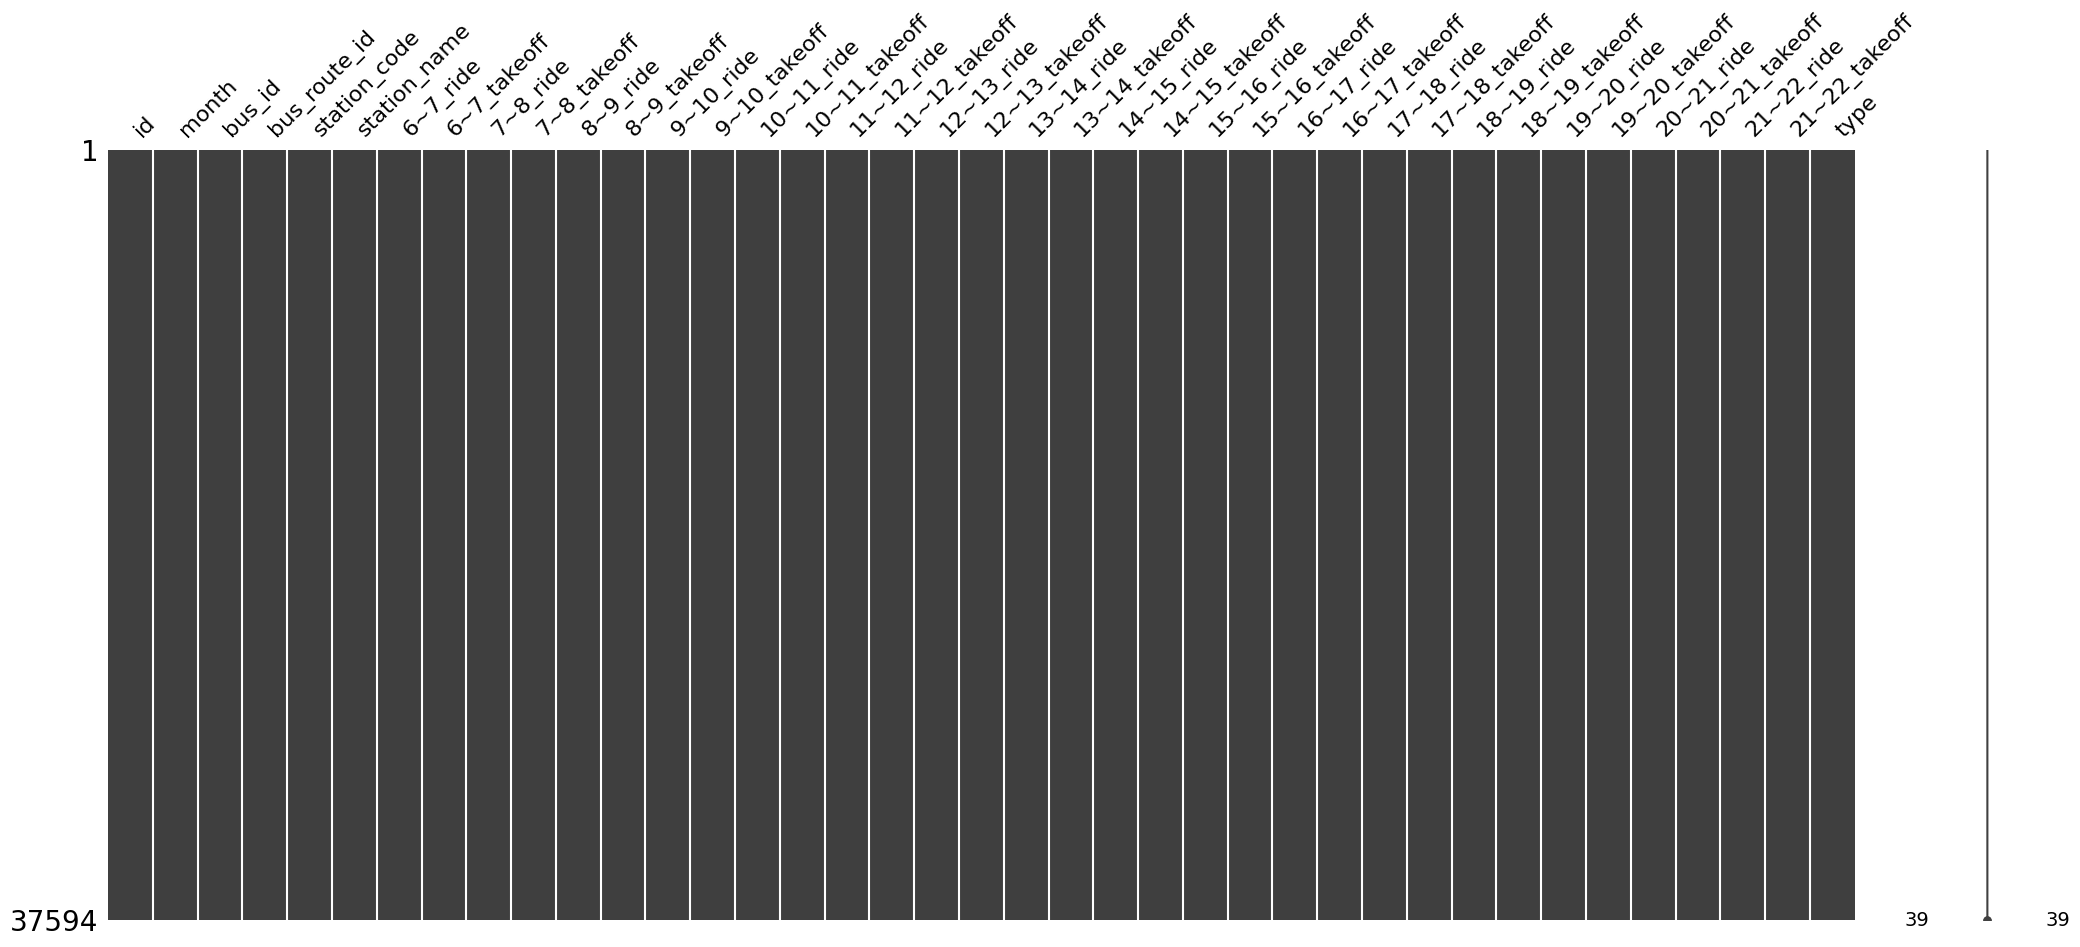

In [191]:
msno.matrix(data)

In [192]:
print(data.isnull().sum())

id               0
month            0
bus_id           0
bus_route_id     0
station_code     0
station_name     0
6~7_ride         0
6~7_takeoff      0
7~8_ride         0
7~8_takeoff      0
8~9_ride         0
8~9_takeoff      0
9~10_ride        0
9~10_takeoff     0
10~11_ride       0
10~11_takeoff    0
11~12_ride       0
11~12_takeoff    0
12~13_ride       0
12~13_takeoff    0
13~14_ride       0
13~14_takeoff    0
14~15_ride       0
14~15_takeoff    0
15~16_ride       0
15~16_takeoff    0
16~17_ride       0
16~17_takeoff    0
17~18_ride       0
17~18_takeoff    0
18~19_ride       0
18~19_takeoff    0
19~20_ride       0
19~20_takeoff    0
20~21_ride       0
20~21_takeoff    0
21~22_ride       0
21~22_takeoff    0
type             0
dtype: int64


주요 퇴근 시간 (17-20) 승차 데이터 분포 확인

0 값이 많음

In [193]:
target_col = ['17~18_ride', '18~19_ride', '19~20_ride']
data[target_col].value_counts().sort_index()

17~18_ride  18~19_ride  19~20_ride
0           0           0             1067
                        1               86
                        2               29
                        3               11
                        4                4
                                      ... 
6632        9004        9368             1
6967        8505        8714             1
7491        9975        9069             1
7660        8807        7821             1
10110       4174        2634             1
Length: 34243, dtype: int64

<Axes: ylabel='Density'>

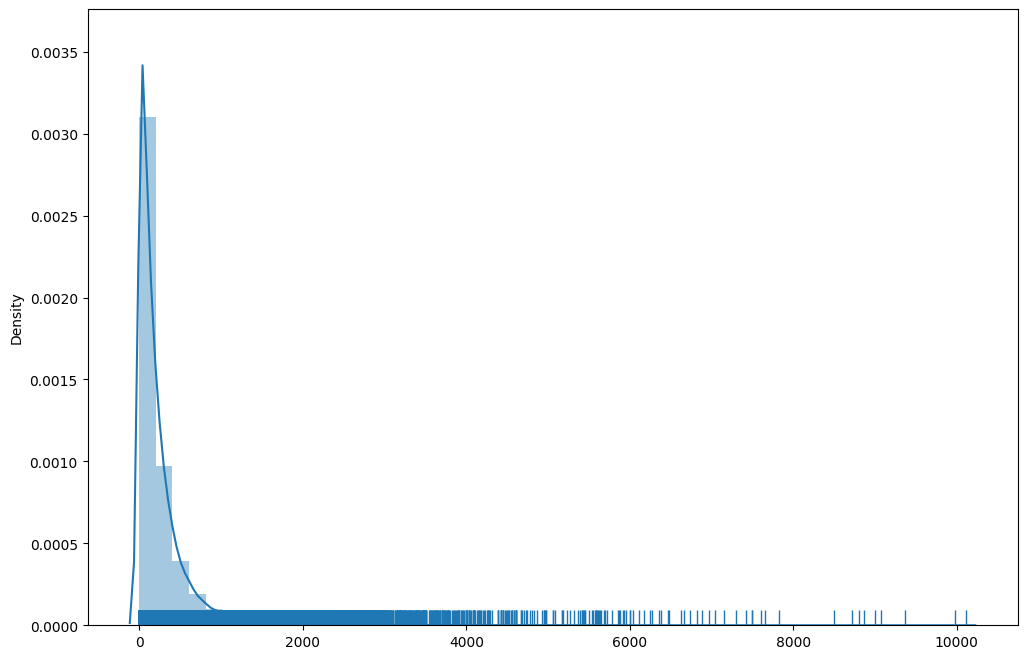

In [194]:
plt.figure(figsize=(12,8))
sns.distplot(data[target_col], rug=True)

하차, 승차 데이터가 1:1 매핑이 아닌 것을 확인할 수 있음

In [195]:
# 탑승 columns, 하차 columns
ride_columns = [col for col in data.columns if '_ride' in col]
take_off_columns = [col for col in data.columns if '_takeoff' in col]

# 승차 칼럼들의 rowsum
print("승차 칼럼 총 합")
display(data[data['18~19_ride']==0][ride_columns].sum(axis=1).agg(['min','max']) )
print("=====================")

# 하차 칼럼들의 rowsum
print("하차 칼럼 총 합")
display(data[data['18~19_takeoff']==0][take_off_columns].sum(axis=1).agg(['min','max']) )
print("=====================")

# 승하차 합 칼럼들의 rowsum
print("승하차 칼럼 총 합")
display(data[data['18~19_ride']==0][ride_columns + take_off_columns].sum(axis=1).agg(['min','max']) )

승차 칼럼 총 합


min        0
max    10116
dtype: int64

하차 칼럼 총 합


min       0
max    9027
dtype: int64

승하차 칼럼 총 합


min        0
max    12164
dtype: int64

## 시간대별 승하차 통계

In [208]:
df = pd.DataFrame(data)

# 시간대별 ride와 takeoff 값의 합을 구해서 새로운 칼럼으로 추가
df['ride'] = df.filter(regex='_ride').sum(axis=1)
df['takeoff'] = df.filter(regex='_takeoff').sum(axis=1)
df= df.groupby('station_code').sum().reset_index()

In [209]:
df.columns

Index(['station_code', 'id', 'month', '6~7_ride', '6~7_takeoff', '7~8_ride',
       '7~8_takeoff', '8~9_ride', '8~9_takeoff', '9~10_ride', '9~10_takeoff',
       '10~11_ride', '10~11_takeoff', '11~12_ride', '11~12_takeoff',
       '12~13_ride', '12~13_takeoff', '13~14_ride', '13~14_takeoff',
       '14~15_ride', '14~15_takeoff', '15~16_ride', '15~16_takeoff',
       '16~17_ride', '16~17_takeoff', '17~18_ride', '17~18_takeoff',
       '18~19_ride', '18~19_takeoff', '19~20_ride', '19~20_takeoff',
       '20~21_ride', '20~21_takeoff', '21~22_ride', '21~22_takeoff', 'ride',
       'takeoff'],
      dtype='object')

### 1) 승차 통계

In [210]:
ride_columns = [col for col in data.columns if '_ride' in col]
ride = df[ride_columns]
ride.head(3)

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
0,369,1100,888,870,794,882,886,796,710,755,611,767,816,758,659,617
1,1304,4063,6421,4720,3850,3900,3295,2995,3548,4950,5247,5941,5283,2125,1754,1379
2,2482,4315,6049,5267,5016,7000,6685,7696,7279,8598,8578,9499,8715,6905,7115,8318


In [211]:
ride.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000
mean,287.395572,647.446675,844.097127,615.069592,510.842961,506.808126,551.443977,577.755594,590.993096,658.688145,734.161006,798.029281,846.360736,608.879940,485.099667,468.871608
std,500.011985,1069.874534,1451.306812,1061.644635,847.878073,852.800901,948.952875,1013.546296,1062.989935,1221.566770,1369.612362,1551.908852,1784.918565,1427.950847,1188.379406,1196.621574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,48.000000,72.000000,52.000000,47.000000,48.000000,51.000000,53.000000,54.000000,58.000000,65.000000,65.000000,58.000000,36.000000,26.000000,21.000000
50%,97.000000,245.000000,324.000000,229.000000,194.000000,192.000000,208.000000,213.000000,213.000000,232.000000,254.000000,256.000000,241.000000,153.000000,115.000000,99.000000
75%,338.000000,782.000000,980.000000,719.000000,612.000000,602.000000,649.000000,671.000000,668.000000,737.750000,809.000000,848.750000,841.000000,568.000000,434.000000,395.000000
max,7657.000000,17955.000000,21589.000000,16355.000000,13508.000000,12332.000000,15114.000000,17059.000000,18720.000000,22114.000000,24049.000000,26165.000000,31391.000000,29384.000000,22759.000000,23167.000000


### 시간대별 승차 인원 평균 값

7-9시에 많이 승차 - 출근시간

17-19시에 많이 승차 - 퇴근시간

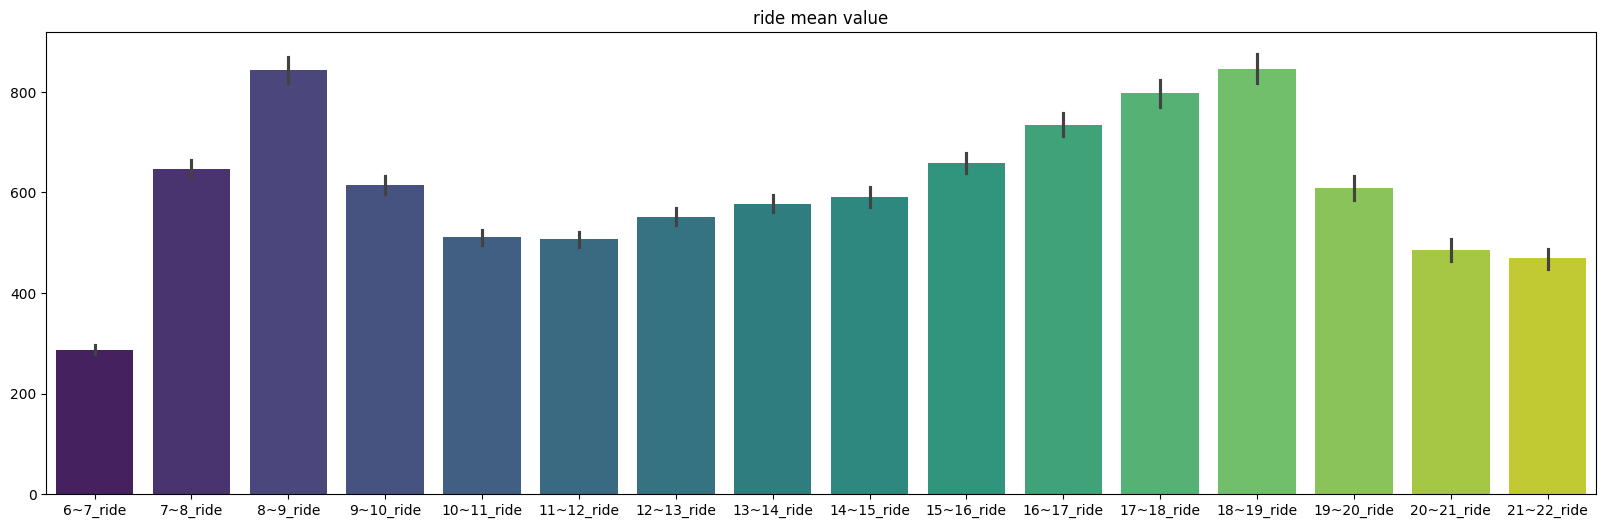

In [212]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ride, palette='viridis')
plt.title('ride mean value')
plt.show()

### 2) 하차 통계

In [213]:
takeoff_columns = [col for col in data.columns if '_takeoff' in col]
takeoff = df[takeoff_columns]
takeoff.head(3)

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
0,175,589,649,788,746,932,894,969,947,999,1198,1247,1337,1013,525,451
1,3771,7326,12798,7355,4168,2860,2656,2972,2968,1920,1523,1231,1069,672,499,700
2,2831,5087,10893,7807,6327,5281,5297,5947,5186,4579,4191,4226,4215,2664,1963,1681


In [214]:
takeoff.describe()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
count,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000,12602.000000
mean,248.461276,542.012141,863.097842,628.667037,506.879226,493.525155,527.154341,562.587288,567.649262,628.940327,697.839708,761.350817,843.039279,654.484923,483.702428,459.205047
std,588.214079,1310.304143,1837.045564,1325.586553,999.759769,965.166212,996.566776,1030.989322,1013.278469,1082.393068,1195.017124,1312.900681,1438.714390,1048.933220,778.574663,743.353012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,38.000000,76.000000,55.000000,50.000000,53.000000,59.000000,65.000000,66.000000,77.000000,85.000000,91.000000,96.000000,72.000000,52.000000,47.000000
50%,67.000000,146.000000,277.500000,197.000000,175.000000,178.000000,200.000000,220.000000,231.000000,265.000000,291.000000,315.000000,350.000000,283.000000,207.500000,190.000000
75%,228.000000,493.500000,867.000000,621.000000,529.000000,517.750000,571.000000,624.000000,642.750000,729.000000,807.750000,875.000000,979.000000,797.000000,594.750000,562.000000
max,15957.000000,38262.000000,53319.000000,35590.000000,21359.000000,18340.000000,18178.000000,18741.000000,18337.000000,18364.000000,20005.000000,19934.000000,21266.000000,17038.000000,13739.000000,12920.000000


### 시간대별 하차 평균값

승차와 유사한 그래프 형태를 띔

8-10시에 많이 하차 - 출근 시간

17-19에 많이 하차 - 퇴근 시간

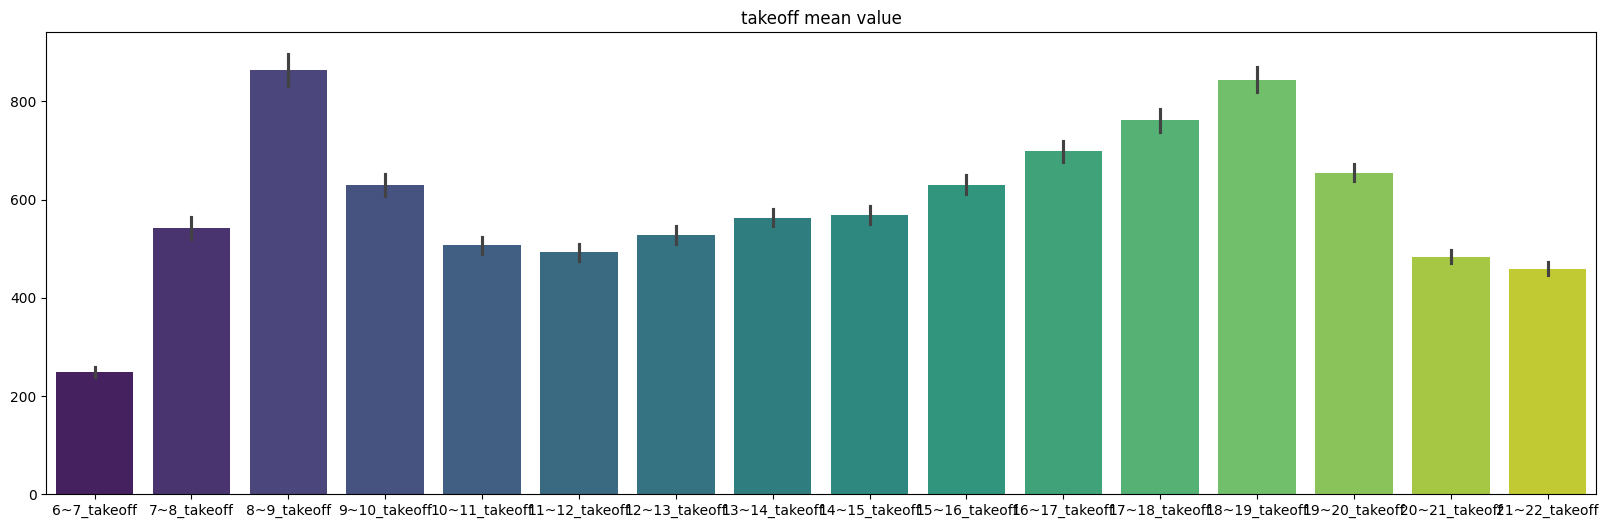

In [215]:
plt.figure(figsize=(20, 6))
sns.barplot(data=takeoff, palette='viridis')
plt.title('takeoff mean value')
plt.show()

## 정류장별 승하차 인원 통계

7-9시, 17-19시 승하차 인원 총합 top 20

### 0) 버스정류장 위도경도 데이터 로딩

In [216]:
location = pd.read_csv(path+'station_location.csv',encoding='cp949')
location.head(3)

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부
0,100000001,종로2가사거리,중앙차로,1001.0,37.569806,126.987752,설치
1,100000002,창경궁.서울대학교병원,중앙차로,1002.0,37.579433,126.996521,설치
2,100000003,명륜3가.성대입구,중앙차로,1003.0,37.582580,126.998251,설치


불필요한 데이터 삭제 및 칼럼명 변경

In [217]:
location = location.drop(['정류장_ID', '정류장_유형', '버스도착정보안내기_설치_여부'], axis =1)
location.columns

Index(['정류장_명칭', '정류장_번호', '위도', '경도'], dtype='object')

In [218]:
columns={'정류장_명칭':'station_name', '정류장_번호': 'station_code',
         '위도': 'lat', '경도':'lng'}

location.rename(columns=columns, inplace=True)
location.columns

Index(['station_name', 'station_code', 'lat', 'lng'], dtype='object')

### 1) 출퇴근 시간 승차 top 20 정류장



In [223]:
df['main_ride'] = df['7~8_ride'] + df['8~9_ride'] + df['17~18_ride'] + df['18~19_ride']
top_ride = df.nlargest(20, 'main_ride')
top_ride


,station_code,id,month,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,9~10_ride,...,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,ride,takeoff,main_ride
7373,19112,337486,2630056,3249,2905,7838,5161,18728,9679,9535,...,16078,22219,9475,21754,6946,19268,4339,257304,171154,81596
8248,21002,273285,1820808,4106,13488,8282,33142,13865,41859,8506,...,18193,29384,10656,22759,6853,23167,5323,231857,275902,76914
8731,22019,619318,4046240,3444,5298,9606,8333,11533,10052,9090,...,17868,23765,13601,20580,9729,17791,9534,261949,200950,72927
5084,14015,384408,4046240,3766,3500,7271,9918,13201,13574,12398,...,15701,22239,10451,20177,6726,23042,5550,250499,177132,66920
6529,17013,281219,2427744,3030,1069,4601,2554,8294,7700,5416,...,7381,25252,5664,19492,4066,20551,4109,203592,68467,64798
8724,22012,616347,4046240,4387,1902,9379,2970,12183,5395,11820,...,19344,16467,11152,14471,6655,17628,5381,237009,142794,63279
8732,22020,619756,4046240,5579,8506,8867,13220,14792,19821,13682,...,18786,16482,11988,14455,8378,12338,7955,233391,254962,61403
9773,23408,343365,2023120,3285,2428,7133,4255,12714,4419,7314,...,3512,20101,2455,14463,2184,14427,1993,184179,48785,59982
2849,9004,177288,3439304,3248,3309,6534,5965,10737,10705,8739,...,20648,18858,17038,14698,13739,14694,11669,200100,199455,58638
2857,9012,211977,4046240,2920,2811,5008,6346,10216,8196,8432,...,21088,19547,16986,17254,13573,14452,12920,220105,197668,57241


top20 승차 정류장 위치 정보 구하기

In [224]:
top_ride_station = location[location['station_code'].isin(top_ride['station_code'])]

top_ride_station

,station_name,station_code,lat,lng
792,순천향대학병원,3162.0,37.536442,127.005730
2211,청량리역환승센터,6019.0,37.580303,127.045723
2289,회기역,6502.0,37.590123,127.057848
3389,수유역.강북구청,9004.0,37.637592,127.025308
3396,미아사거리역,9011.0,37.613762,127.029933
3397,미아사거리역,9012.0,37.612894,127.030213
6212,홍대입구역,14015.0,37.556640,126.923465
7743,신도림역,17001.0,37.509676,126.889223
7755,구로디지털단지역,17013.0,37.483099,126.901548
8800,경방타임스퀘어.신세계백화점,19112.0,37.517508,126.906240


In [227]:
import folium
from folium.plugins import MarkerCluster

# 서울 주요 장소의 임의 지역 위도, 경도
seoul = (37.5665, 126.9780)  # 서울 중심지

# 서울 지역이 보일 수 있는 위치의 위도, 경도를 표시한 뒤, folium.Map에 변수로 넣고, map_osm에 할당
map_osm = folium.Map(location=seoul, zoom_start=12)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=seoul, popup='서울 중심지', icon=folium.Icon(color='red', icon='info-sign')))
map_osm.add_child(mc)

for row in top_ride_station.itertuples():
    mc.add_child(folium.Marker(location=[row.lat,  row.lng], popup=row.station_name)) #마커 생성
    map_osm.add_child(mc) #마커를 map_osm에 추가

map_osm


### 2) 출퇴근 시간 하차 top 20 정류장

In [232]:
df['main_takeoff'] = df['7~8_takeoff'] + df['8~9_takeoff'] + df['17~18_takeoff'] + df['18~19_takeoff']
top_takeoff = df.nlargest(20, 'main_takeoff')
top_takeoff

,station_code,id,month,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,9~10_ride,...,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,ride,takeoff,main_ride,main_takeoff
8247,21001,376038,2630056,4721,15957,9160,38262,13913,53319,9069,...,10867,12430,7924,8054,7231,6311,137058,332100,48136,132781
8248,21002,273285,1820808,4106,13488,8282,33142,13865,41859,8506,...,29384,10656,22759,6853,23167,5323,231857,275902,76914,109629
8267,21117,320696,2225432,1897,10938,2849,24813,4350,32709,2903,...,5514,9714,4225,6229,4002,5162,58761,227172,18151,84106
7837,20114,303970,2225432,753,9871,1979,23426,2849,34050,2489,...,2430,6352,1856,4708,2133,4143,35723,201606,11417,79522
8732,22020,619756,4046240,5579,8506,8867,13220,14792,19821,13682,...,16482,11988,14455,8378,12338,7955,233391,254962,61403,69763
6518,17002,302945,2630056,2089,10076,5826,21119,8190,23493,5454,...,3899,5781,3247,3843,3252,3249,74299,184535,24918,68130
5085,14016,285405,3034680,1497,4701,3201,12202,5017,15937,3511,...,12066,12133,11583,8565,12972,7255,119717,217755,33347,66321
3270,10015,141030,2427744,2330,9161,3895,20875,5199,24597,4436,...,4479,5536,3748,3967,3256,3190,70700,170943,20039,64025
1575,6015,92107,3236992,3652,6663,6683,13182,10277,20186,8228,...,8665,6519,8185,4665,6516,4445,139570,197255,38638,56975
4368,12381,201552,2630056,1529,7896,3281,19803,5050,22911,2457,...,1133,3901,778,2812,666,2488,28489,137203,11190,56434


top20 하차 정류장 위치 정보 구하기

In [233]:
top_takeoff_station = location[location['station_code'].isin(top_takeoff['station_code'])]

top_takeoff_station

,station_name,station_code,lat,lng
795,순천향대학병원.한남오거리,3165.0,37.535491,127.005729
1963,청량리역환승센타,6015.0,37.580403,127.045431
3389,수유역.강북구청,9004.0,37.637592,127.025308
3397,미아사거리역,9012.0,37.612894,127.030213
3561,롯데백화점미아점,9277.0,37.614709,127.030756
3591,수유(강북구청)역,9013.0,37.638290,127.025870
3892,쌍문역,10015.0,37.648817,127.034769
5140,녹번역,12381.0,37.600872,126.934226
6204,홍대입구역,14016.0,37.557326,126.924316
6212,홍대입구역,14015.0,37.556640,126.923465


In [234]:
import folium
from folium.plugins import MarkerCluster

# 서울 주요 장소의 임의 지역 위도, 경도
seoul = (37.5665, 126.9780)  # 서울 중심지

# 서울 지역이 보일 수 있는 위치의 위도, 경도를 표시한 뒤, folium.Map에 변수로 넣고, map_osm에 할당
map_osm = folium.Map(location=seoul, zoom_start=11)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=seoul, popup='서울 중심지', icon=folium.Icon(color='red', icon='info-sign')))
map_osm.add_child(mc)

for row in top_takeoff_station.itertuples():
    mc.add_child(folium.Marker(location=[row.lat,  row.lng], popup=row.station_name)) #마커 생성
    map_osm.add_child(mc) #마커를 map_osm에 추가

map_osm


## 버스 노선 종류별 통계

버스 노선 시내 (간선, 지선), 마을, 광역 총 3가지로 나눠 진행

시간대별 승하차 인원 분석 및 비교

### 0) 데이터 전처리

In [280]:
data.columns

Index(['id', 'month', 'bus_id', 'bus_route_id', 'station_code', 'station_name',
       '6~7_ride', '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride',
       '8~9_takeoff', '9~10_ride', '9~10_takeoff', '10~11_ride',
       '10~11_takeoff', '11~12_ride', '11~12_takeoff', '12~13_ride',
       '12~13_takeoff', '13~14_ride', '13~14_takeoff', '14~15_ride',
       '14~15_takeoff', '15~16_ride', '15~16_takeoff', '16~17_ride',
       '16~17_takeoff', '17~18_ride', '17~18_takeoff', '18~19_ride',
       '18~19_takeoff', '19~20_ride', '19~20_takeoff', '20~21_ride',
       '20~21_takeoff', '21~22_ride', '21~22_takeoff', 'type'],
      dtype='object')

In [281]:
# 버스 아이디로 그룹화
dic = {'id': 'first', 'month': 'first', 'type': 'first',
      '6~7_ride': 'sum', '6~7_takeoff': 'sum', '7~8_ride': 'sum',
    '7~8_takeoff': 'sum', '8~9_ride': 'sum', '8~9_takeoff': 'sum',
    '9~10_ride': 'sum', '9~10_takeoff': 'sum', '10~11_ride': 'sum',
    '10~11_takeoff': 'sum', '11~12_ride': 'sum', '11~12_takeoff': 'sum',
    '12~13_ride': 'sum', '12~13_takeoff': 'sum', '13~14_ride': 'sum',
    '13~14_takeoff': 'sum', '14~15_ride': 'sum', '14~15_takeoff': 'sum',
    '15~16_ride': 'sum', '15~16_takeoff': 'sum', '16~17_ride': 'sum',
    '16~17_takeoff': 'sum', '17~18_ride': 'sum', '17~18_takeoff': 'sum',
    '18~19_ride': 'sum', '18~19_takeoff': 'sum', '19~20_ride': 'sum',
    '19~20_takeoff': 'sum', '20~21_ride': 'sum', '20~21_takeoff': 'sum',
    '21~22_ride': 'sum', '21~22_takeoff': 'sum'}
df = data
df= df.groupby('bus_id').agg(dic).reset_index()
df

,bus_id,id,month,type,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,17~18_ride,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff
0,0017,2591,202312,서울지선버스,4734,4531,10896,9432,15536,15869,...,12540,11803,14528,14441,10650,11176,8008,7997,8011,7932
1,01A,46,202312,서울순환버스,568,415,3163,2799,7113,6678,...,17084,15971,15482,15086,13199,12434,9241,9187,7820,7934
2,01B,1939,202312,서울순환버스,182,140,617,565,1872,1750,...,7992,8022,7373,6252,4325,4687,4251,4298,3086,2948
3,0411,2852,202312,서울지선버스,4644,3568,13223,10393,21643,21897,...,20626,19419,21103,21076,13897,15238,11320,11130,10897,10664
4,100,4,202312,서울간선버스,11680,9627,25105,20720,32739,33213,...,38918,37182,36424,37358,23706,25733,21065,20755,22415,20911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,종로11,159,202312,서울마을버스,1563,1397,3561,3098,6115,5582,...,8118,8070,7152,7410,4520,4564,3850,3857,2688,2802
616,종로12,411,202312,서울마을버스,3681,3546,6778,6328,9390,9065,...,2896,2845,2536,2593,1460,1507,856,911,815,775
617,종로13,247,202312,서울마을버스,494,454,2370,2123,2413,2559,...,1738,1689,1494,1599,1332,1331,1134,1160,923,914
618,중랑01,6489,202312,서울마을버스,305,214,714,691,592,668,...,332,305,374,349,290,329,166,166,119,110


In [282]:
# 마을 버스
data_town = df[df['type'].str.contains('마을')]

# 시내 버스
data_city = df[df['type'].str.contains('간선|지선')]

# 광역 버스
data_wide = df[df['type'].str.contains('광역')]

In [283]:
print("마을 버스", data_town.shape)
print("시내 버스", data_city.shape)
print("광역 버스", data_wide.shape)
print("전체 데이터", data.shape)

마을 버스 (245, 36)
시내 버스 (360, 36)
광역 버스 (13, 36)
전체 데이터 (37594, 39)


### 1) 마을 버스 시간대별 분석

In [292]:
ride_columns = [col for col in data.columns if '_ride' in col]
takeoff_columns = [col for col in data.columns if '_takeoff' in col]

승차 분석

In [311]:
ride_town = data_town[ride_columns]
ride_town.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2750.310204,6651.975510,8504.706122,6115.791837,5116.763265,4987.179592,5353.187755,5567.457143,5724.183673,6424.955102,7110.542857,7610.395918,8141.273469,6228.008163,4679.130612,4427.261224
std,2352.938265,5449.352839,7002.957272,5116.343000,4278.455091,4189.881134,4536.433422,4623.483149,4751.449553,5232.211058,5789.499512,6255.988292,6552.855052,5124.643201,3974.626779,3778.397998
min,0.000000,0.000000,0.000000,15.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1106.000000,2734.000000,3389.000000,2198.000000,2012.000000,1965.000000,2097.000000,2108.000000,2260.000000,2525.000000,2687.000000,2872.000000,3381.000000,2503.000000,1715.000000,1587.000000
50%,2105.000000,5312.000000,6558.000000,4573.000000,4052.000000,4020.000000,4297.000000,4331.000000,4515.000000,5104.000000,5818.000000,6230.000000,6534.000000,5086.000000,3827.000000,3564.000000
75%,4029.000000,9197.000000,11385.000000,8831.000000,6676.000000,6757.000000,7173.000000,7439.000000,7540.000000,8702.000000,9459.000000,9987.000000,10975.000000,8055.000000,6084.000000,5676.000000
max,15520.000000,34722.000000,47066.000000,30491.000000,27894.000000,27950.000000,29947.000000,29034.000000,31940.000000,32136.000000,35271.000000,38578.000000,39349.000000,30584.000000,25342.000000,24511.000000


하차 분석

In [310]:
takeoff_town = data_town[takeoff_columns]
takeoff_town.describe()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.00000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2453.461224,5891.853061,8585.983673,6160.832653,5063.485714,4867.587755,5170.926531,5423.873469,5518.15102,6184.008163,6829.469388,7344.028571,8022.016327,6487.518367,4685.640816,4342.693878
std,2109.048469,4795.301164,7070.422391,5182.223889,4257.073389,4083.712242,4381.498905,4524.095562,4580.77417,5034.581363,5563.831369,6030.965184,6474.286015,5314.790173,3974.655477,3701.391183
min,0.000000,0.000000,0.000000,1.000000,186.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,941.000000,2502.000000,3403.000000,2253.000000,1910.000000,1957.000000,2004.000000,2114.000000,2212.00000,2384.000000,2637.000000,2798.000000,3363.000000,2555.000000,1765.000000,1561.000000
50%,1828.000000,4794.000000,6718.000000,4572.000000,4007.000000,3854.000000,4127.000000,4298.000000,4367.00000,4948.000000,5510.000000,6026.000000,6414.000000,5307.000000,3813.000000,3516.000000
75%,3546.000000,8006.000000,11548.000000,8929.000000,6733.000000,6540.000000,6883.000000,7202.000000,7379.00000,8312.000000,9211.000000,9558.000000,10774.000000,8264.000000,6080.000000,5602.000000
max,14008.000000,30285.000000,48051.000000,31768.000000,27736.000000,27137.000000,28723.000000,29124.000000,30505.00000,31233.000000,34097.000000,37289.000000,39337.000000,31068.000000,25124.000000,23961.000000


### 2) 시내 버스 분석

승차 분석

In [309]:
ride_city = data_city[ride_columns]
ride_town.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2750.310204,6651.975510,8504.706122,6115.791837,5116.763265,4987.179592,5353.187755,5567.457143,5724.183673,6424.955102,7110.542857,7610.395918,8141.273469,6228.008163,4679.130612,4427.261224
std,2352.938265,5449.352839,7002.957272,5116.343000,4278.455091,4189.881134,4536.433422,4623.483149,4751.449553,5232.211058,5789.499512,6255.988292,6552.855052,5124.643201,3974.626779,3778.397998
min,0.000000,0.000000,0.000000,15.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1106.000000,2734.000000,3389.000000,2198.000000,2012.000000,1965.000000,2097.000000,2108.000000,2260.000000,2525.000000,2687.000000,2872.000000,3381.000000,2503.000000,1715.000000,1587.000000
50%,2105.000000,5312.000000,6558.000000,4573.000000,4052.000000,4020.000000,4297.000000,4331.000000,4515.000000,5104.000000,5818.000000,6230.000000,6534.000000,5086.000000,3827.000000,3564.000000
75%,4029.000000,9197.000000,11385.000000,8831.000000,6676.000000,6757.000000,7173.000000,7439.000000,7540.000000,8702.000000,9459.000000,9987.000000,10975.000000,8055.000000,6084.000000,5676.000000
max,15520.000000,34722.000000,47066.000000,30491.000000,27894.000000,27950.000000,29947.000000,29034.000000,31940.000000,32136.000000,35271.000000,38578.000000,39349.000000,30584.000000,25342.000000,24511.000000


하차 분석

In [308]:
takeoff_city = data_city[takeoff_columns]
ride_town.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2750.310204,6651.975510,8504.706122,6115.791837,5116.763265,4987.179592,5353.187755,5567.457143,5724.183673,6424.955102,7110.542857,7610.395918,8141.273469,6228.008163,4679.130612,4427.261224
std,2352.938265,5449.352839,7002.957272,5116.343000,4278.455091,4189.881134,4536.433422,4623.483149,4751.449553,5232.211058,5789.499512,6255.988292,6552.855052,5124.643201,3974.626779,3778.397998
min,0.000000,0.000000,0.000000,15.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1106.000000,2734.000000,3389.000000,2198.000000,2012.000000,1965.000000,2097.000000,2108.000000,2260.000000,2525.000000,2687.000000,2872.000000,3381.000000,2503.000000,1715.000000,1587.000000
50%,2105.000000,5312.000000,6558.000000,4573.000000,4052.000000,4020.000000,4297.000000,4331.000000,4515.000000,5104.000000,5818.000000,6230.000000,6534.000000,5086.000000,3827.000000,3564.000000
75%,4029.000000,9197.000000,11385.000000,8831.000000,6676.000000,6757.000000,7173.000000,7439.000000,7540.000000,8702.000000,9459.000000,9987.000000,10975.000000,8055.000000,6084.000000,5676.000000
max,15520.000000,34722.000000,47066.000000,30491.000000,27894.000000,27950.000000,29947.000000,29034.000000,31940.000000,32136.000000,35271.000000,38578.000000,39349.000000,30584.000000,25342.000000,24511.000000


### 3) 광역 버스 분석

승차 분석

In [313]:
ride_wide = data_wide[ride_columns]
ride_wide.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2959.923077,5491.538462,5107.000000,3503.461538,2952.384615,2826.153846,3000.076923,2915.692308,2898.538462,3458.615385,3981.538462,4735.769231,4952.923077,3401.230769,3060.076923,3317.846154
std,4028.086797,5770.224080,5437.565708,4382.800905,4387.661232,3979.257465,4162.273587,4033.675999,4042.914205,4726.181079,4984.237414,5163.285875,5233.753074,3854.457812,3759.818756,4031.738662
min,41.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,707.000000,1437.000000,1571.000000,927.000000,525.000000,435.000000,503.000000,523.000000,529.000000,627.000000,1043.000000,1481.000000,1698.000000,986.000000,823.000000,715.000000
50%,1634.000000,3166.000000,3257.000000,2188.000000,1835.000000,1621.000000,1821.000000,1925.000000,1867.000000,2256.000000,2568.000000,3061.000000,3260.000000,2113.000000,1905.000000,2010.000000
75%,3771.000000,7411.000000,7580.000000,5260.000000,3687.000000,3993.000000,4292.000000,4351.000000,4338.000000,4290.000000,5123.000000,6723.000000,7737.000000,5771.000000,5074.000000,5529.000000
max,15203.000000,21417.000000,18693.000000,16128.000000,16483.000000,14877.000000,15512.000000,15061.000000,15139.000000,17708.000000,18434.000000,18560.000000,18560.000000,13927.000000,13770.000000,14768.000000


하차 분석

In [314]:
takeoff_wide = data_wide[takeoff_columns]
takeoff_wide.describe()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1466.153846,3909.153846,6251.692308,4244.461538,2958.769231,2883.615385,2873.153846,2913.692308,2773.692308,2958.153846,3499.923077,4080.615385,4823.153846,4475.000000,3209.307692,2939.384615
std,2010.089295,4588.268516,6384.476491,5095.322277,4029.095435,4249.686019,4056.959922,4051.714254,3893.086166,3839.386883,4492.752246,4752.022491,5022.892308,5179.548404,3910.427180,3260.544063
min,0.000000,95.000000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,869.000000,1924.000000,1066.000000,634.000000,483.000000,436.000000,510.000000,528.000000,548.000000,794.000000,1213.000000,1741.000000,1317.000000,814.000000,766.000000
50%,1052.000000,2567.000000,3893.000000,2664.000000,1834.000000,1735.000000,1695.000000,1824.000000,1829.000000,2015.000000,2394.000000,2638.000000,3236.000000,2896.000000,1833.000000,1981.000000
75%,2120.000000,5635.000000,9238.000000,5695.000000,4154.000000,3531.000000,4272.000000,4267.000000,4155.000000,4062.000000,4058.000000,5126.000000,7109.000000,7239.000000,5196.000000,5094.000000
max,7381.000000,17375.000000,22538.000000,18768.000000,15092.000000,15972.000000,15139.000000,15120.000000,14586.000000,14306.000000,16688.000000,17411.000000,17701.000000,18988.000000,14124.000000,11537.000000
